In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random

In [2]:
df2018 = pd.read_excel('WHR2018Chapter2OnlineData.xls', sheet_name='Figure2.2', usecols='A:K', header=0, nrows=156)
df2018.shape

(156, 11)

In [3]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 11 columns):
Country                                       156 non-null object
Happiness score                               156 non-null float64
Whisker-high                                  156 non-null float64
Whisker-low                                   156 non-null float64
Dystopia (1.92) + residual                    156 non-null float64
Explained by: GDP per capita                  156 non-null float64
Explained by: Social support                  156 non-null float64
Explained by: Healthy life expectancy         156 non-null float64
Explained by: Freedom to make life choices    156 non-null float64
Explained by: Generosity                      156 non-null float64
Explained by: Perceptions of corruption       156 non-null float64
dtypes: float64(10), object(1)
memory usage: 13.5+ KB


In [4]:
old_column_names = list(df2018.columns)
def change_col_name(x):
    if x.startswith('Explained by: '):
        return x[14:] # drop "Explained by"
    else:
        return x
    
new_column_names = [change_col_name(x) for x in old_column_names]
df2018.columns = new_column_names

In [5]:
df2018.columns

Index(['Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.92) + residual', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [6]:
df2018.corr()

,Happiness score,Whisker-high,Whisker-low,Dystopia (1.92) + residual,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Happiness score,1.000000,0.999552,0.999572,0.473657,0.807384,0.764660,0.777542,0.562397,0.141490,0.408406
Whisker-high,0.999552,1.000000,0.998249,0.476590,0.806627,0.764187,0.772475,0.562169,0.141848,0.405102
Whisker-low,0.999572,0.998249,1.000000,0.470378,0.807426,0.764461,0.781823,0.562134,0.141018,0.411283
Dystopia (1.92) + residual,0.473657,0.476590,0.470378,1.000000,0.000238,0.042941,-0.002598,0.083243,-0.066530,-0.028739
GDP per capita,0.807384,0.806627,0.807426,0.000238,1.000000,0.725095,0.864831,0.363491,-0.005585,0.315322
Social support,0.764660,0.764187,0.764461,0.042941,0.725095,1.000000,0.674630,0.405505,0.018847,0.218967
Healthy life expectancy,0.777542,0.772475,0.781823,-0.002598,0.864831,0.674630,1.000000,0.356210,0.022929,0.312976
Freedom to make life choices,0.562397,0.562169,0.562134,0.083243,0.363491,0.405505,0.356210,1.000000,0.304452,0.465370
Generosity,0.141490,0.141848,0.141018,-0.066530,-0.005585,0.018847,0.022929,0.304452,1.000000,0.363306
Perceptions of corruption,0.408406,0.405102,0.411283,-0.028739,0.315322,0.218967,0.312976,0.465370,0.363306,1.000000


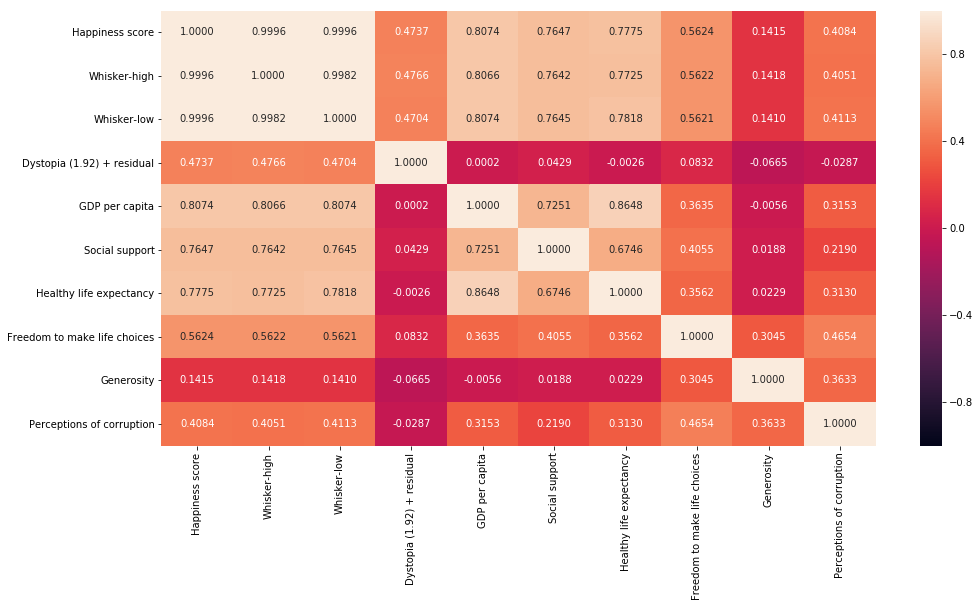

In [7]:
f, ax = plt.subplots(1,1, figsize=(16,8))
sb.heatmap(df2018.corr(), vmin = -1, vmax=1, annot=True, fmt='.4f')

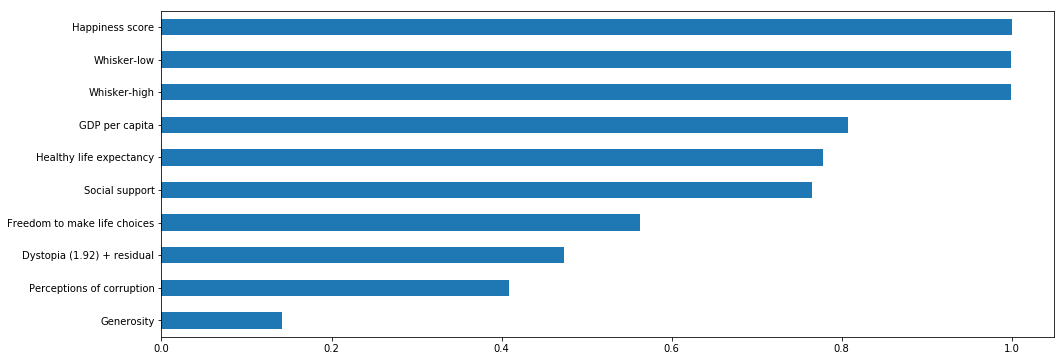

In [8]:
df2018.corr().iloc[0,].sort_values().plot.barh(figsize=(16,6))

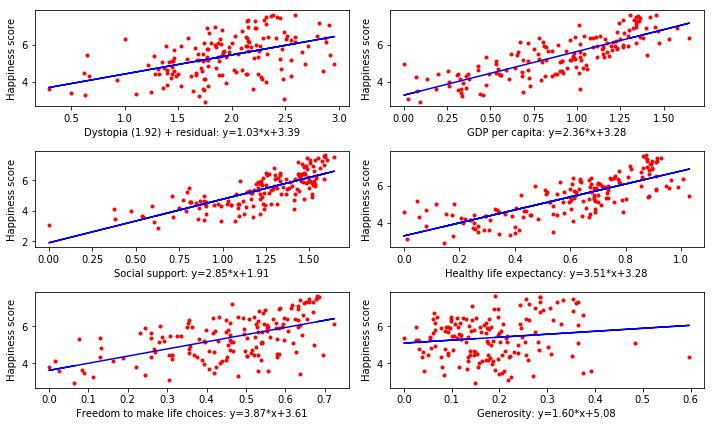

In [9]:
# Relationship between GDP and happiness
from sklearn.linear_model import LinearRegression
i=0
f, axes = plt.subplots(3,2, figsize=(10,6))
for col in df2018.columns[4:10]:
    lrg = LinearRegression()
    lrg.fit(np.array(df2018[col]).reshape(-1,1), df2018['Happiness score'])
    a = lrg.coef_[0]
    b = lrg.intercept_
    y_pred = lrg.predict(np.array(df2018[col]).reshape(-1,1))
    
    plt.subplot(3,2,i+1)
    plt.plot(df2018[col], df2018['Happiness score'], 'r.')
    plt.plot(df2018[col], y_pred, 'b-')
    plt.xlabel('{}: y={:.2f}*x+{:.2f}'.format(col,a,b))
    plt.ylabel('Happiness score')
    i=i+1

plt.tight_layout(True)

In [10]:
# Poly Regression with Normalize
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn

steps = [('scaler', StandardScaler()),
        ('linreg_scaler', LinearRegression())]

ppl1 = Pipeline(steps)
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=10)
ppl1.fit(X1_train, y1_train)
print("Training set R^2:", ppl1.score(X1_train, y1_train))
print("Test set R^2:", ppl1.score(X1_test, y1_test))

NameError: name 'train_test_split' is not defined